In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
market_data = pd.read_csv('/content/CA_market_data (1).csv')

In [ ]:
market_data.head()

,Geography Name,Concept Name,Quarter,Value
0,Bakersfield - CA USA,All Service Type Rent Direct,2019 Q3,$0.63
1,Bakersfield - CA USA,All Service Type Rent Overall,2019 Q3,$0.64
2,Bakersfield - CA USA,All Service Type Rent Sublet,2019 Q3,$0.88
3,Bakersfield - CA USA,Appreciation Return,2019 Q3,5.4%
4,Bakersfield - CA USA,Asset Value,2019 Q3,"$5,184,825,856"


In [ ]:
# Melt the dataset to long format
market_data = pd.melt(
    market_data,
    id_vars=["Geography Name", "Concept Name"],  # Keep these columns as identifiers
    var_name="Quarter",                         # Name for the quarter columns
    value_name="Value"                          # Name for the data values
)

ValueError: value_name (Value) cannot match an element in the DataFrame columns.

In [ ]:
market_data.head()

,Geography Name,Concept Name,Quarter,Value
0,Bakersfield - CA USA,All Service Type Rent Direct,2019 Q3,$0.63
1,Bakersfield - CA USA,All Service Type Rent Overall,2019 Q3,$0.64
2,Bakersfield - CA USA,All Service Type Rent Sublet,2019 Q3,$0.88
3,Bakersfield - CA USA,Appreciation Return,2019 Q3,5.4%
4,Bakersfield - CA USA,Asset Value,2019 Q3,"$5,184,825,856"


In [ ]:
# Extract the state abbreviation from the 'Geography Name' column
market_data["State"] = market_data["Geography Name"].str.split(" - ").str[1].str.split(" ").str[0]

# Filter for rows where the state is 'CA' (California)
market_data = market_data[market_data["State"] == "CA"]

# Drop the 'State' column if it's no longer needed
market_data.drop(columns=["State"], inplace=True)

# Reset the index after filtering
market_data.reset_index(drop=True, inplace=True)


<ipython-input-6-89f19e203146>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data.drop(columns=["State"], inplace=True)


In [ ]:
market_data.to_csv('CA_market_data.csv', index=False)

In [ ]:
market_data.head()

,Geography Name,Concept Name,Quarter,Value
0,Bakersfield - CA USA,All Service Type Rent Direct,2019 Q3,$0.63
1,Bakersfield - CA USA,All Service Type Rent Overall,2019 Q3,$0.64
2,Bakersfield - CA USA,All Service Type Rent Sublet,2019 Q3,$0.88
3,Bakersfield - CA USA,Appreciation Return,2019 Q3,5.4%
4,Bakersfield - CA USA,Asset Value,2019 Q3,"$5,184,825,856"


In [ ]:
print("Unique Geography Names in market_data:", market_data['Geography Name'].unique())


Unique Geography Names in market_data: ['Bakersfield - CA USA' 'Chico - CA USA' 'Clearlake - CA USA'
 'Crescent City - CA USA' 'East Bay - CA USA' 'El Centro - CA USA'
 'Eureka-Arcata - CA USA' 'Fresno - CA USA' 'Hanford-Corcoran - CA USA'
 'Inland Empire - CA USA' 'Los Angeles - CA USA' 'Madera - CA USA'
 'Merced - CA USA' 'Modesto - CA USA' 'Napa - CA USA'
 'Orange County - CA USA' 'Red Bluff - CA USA' 'Redding - CA USA'
 'Sacramento - CA USA' 'Salinas - CA USA' 'San Diego - CA USA'
 'San Francisco - CA USA' 'San Jose - CA USA' 'San Luis Obispo - CA USA'
 'San Rafael - CA USA' 'Santa Barbara - CA USA' 'Santa Cruz - CA USA'
 'Santa Rosa - CA USA' 'Sonora - CA USA' 'Stockton - CA USA'
 'Susanville - CA USA' 'Truckee - CA USA' 'Ukiah - CA USA'
 'Vallejo-Fairfield - CA USA' 'Ventura - CA USA' 'Visalia - CA USA'
 'Yuba City - CA USA']


In [ ]:
# Remove rows with '2024Q4 EST'
market_data = market_data[~market_data["Quarter"].str.contains("2024Q4QTD", na=False)]

# Remove any extra spaces
market_data["Quarter"] = market_data["Quarter"].str.strip()

# Replace "QTD" with an empty string to ensure valid quarter strings (e.g., "2024Q4QTD" -> "2024Q4")
market_data["Quarter"] = market_data["Quarter"].str.replace(" EST", "", regex=False)

# Replace " Q" with "Q" to ensure consistent formatting
market_data["Quarter"] = market_data["Quarter"].str.replace(" Q", "Q", regex=False)

# Filter for valid quarters (e.g., "2024Q1", "2024Q2", etc.)
market_data = market_data[market_data["Quarter"].str.match(r"^\d{4}Q[1-4]$", na=False)]

# Convert 'Quarter' to PeriodIndex with quarterly frequency
market_data["Quarter"] = pd.PeriodIndex(market_data["Quarter"], freq="Q")

# Reset the index after filtering (optional)
market_data.reset_index(drop=True, inplace=True)


In [ ]:
market_data['Concept Name'].unique()

array(['All Service Type Rent Direct', 'All Service Type Rent Overall',
       'All Service Type Rent Sublet', 'Appreciation Return',
       'Asset Value', 'Availability Rate', 'Availability Rate % Direct',
       'Availability Rate % Sublet', 'Available SF Direct',
       'Available SF Sublet', 'Available SF Total', 'Average Sale Price',
       'Cap Rate', 'Cap Rate Transactions', 'Capital Value Index',
       'Construction Starts SF', 'Construction Starts SF 12 Mo',
       'Demand SF', 'Demolished SF', 'Existing Buildings',
       'Gross Delivered Buildings', 'Gross Delivered SF', 'Households',
       'Income Return', 'Industrial Employment', 'Inventory SF',
       'Leasing SF Direct', 'Leasing SF Sublet', 'Leasing SF Total',
       'Market Asking Rent Growth', 'Market Asking Rent Growth 12 Mo',
       'Market Asking Rent Index', 'Market Asking Rent/SF',
       'Market Cap Rate', 'Market Sale Price Growth',
       'Market Sale Price Index', 'Market Sale Price Per SF',
       'Median 

<ipython-input-33-36dc0d4d1f09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Market_Asking_Rentpsf["Value"] = pd.to_numeric(Market_Asking_Rentpsf["Value"].str.replace("[$,]", "", regex=True))
<ipython-input-33-36dc0d4d1f09>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


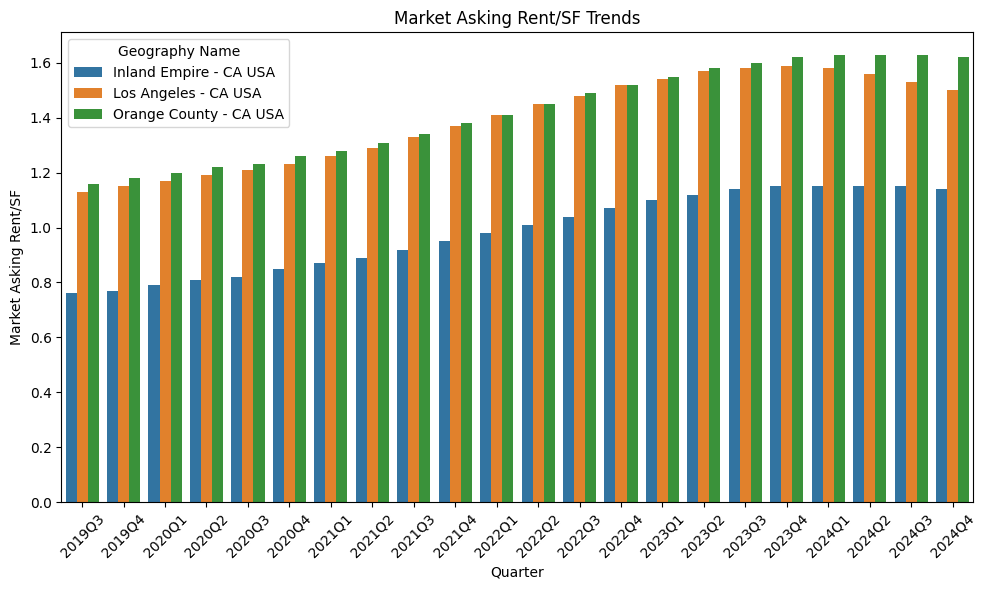

In [ ]:
# Filter data for 'Inventory SF'
Market_Asking_Rentpsf = market_data[market_data["Concept Name"] == "Market Asking Rent/SF"]

# Ensure 'Value' column is numeric
Market_Asking_Rentpsf["Value"] = pd.to_numeric(Market_Asking_Rentpsf["Value"].str.replace("[$,]", "", regex=True))

# Define selected markets
markets = ["Los Angeles - CA USA", "Orange County - CA USA", "Inland Empire - CA USA"]  # Example markets

# Filter data for the selected markets
filtered_data = Market_Asking_Rentpsf[Market_Asking_Rentpsf["Geography Name"].isin(markets)]

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot with seaborn
sns.barplot(
    data=filtered_data,
    x="Quarter",  # X-axis: Quarter
    y="Value",    # Y-axis: Asking Rent (Value)
    hue="Geography Name",  # Use Geography Name for grouping
    ci=None  # Disable confidence intervals
)

# Add labels and title
plt.title("Market Asking Rent/SF Trends")
plt.xlabel("Quarter")
plt.ylabel("Market Asking Rent/SF")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

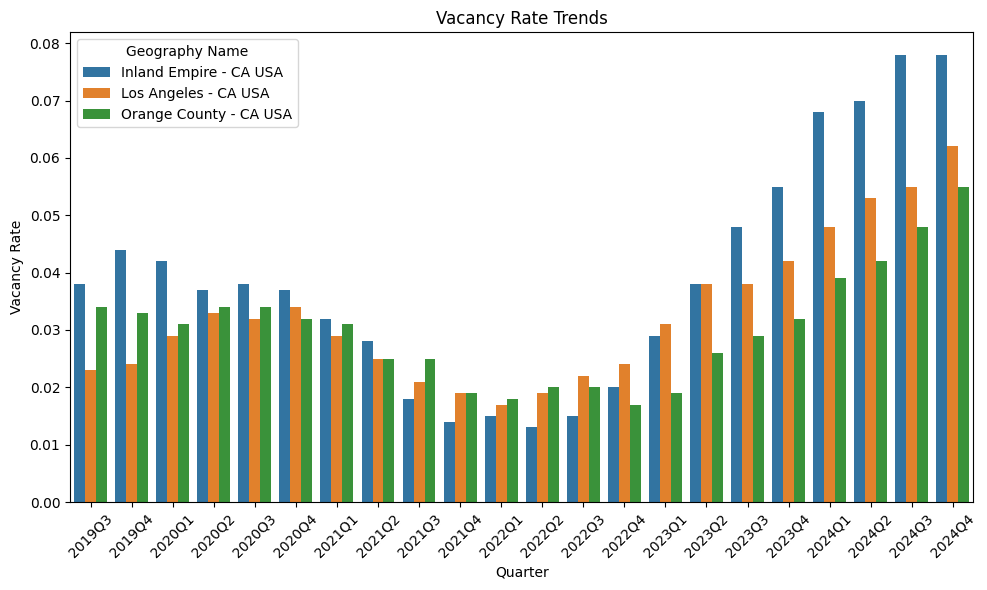

In [ ]:
# Filter data for 'Vacancy Rate'
Vacancy_rate_data = market_data[market_data["Concept Name"] == "Vacancy Rate"]

# Ensure 'Value' column is numeric, handling percentage values
Vacancy_rate_data.loc[:, "Value"] = pd.to_numeric(
    Vacancy_rate_data["Value"].str.replace("%", "", regex=False)
) / 100  # Convert percentage to decimal

# Define selected markets
markets = ["Los Angeles - CA USA", "Orange County - CA USA", "Inland Empire - CA USA"]

# Filter data for the selected markets
filtered_data = Vacancy_rate_data[Vacancy_rate_data["Geography Name"].isin(markets)]

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot with seaborn
sns.barplot(
    data=filtered_data,
    x="Quarter",  # X-axis: Quarter
    y="Value",    # Y-axis: Vacancy Rate (Value)
    hue="Geography Name",  # Use Geography Name for grouping
    errorbar=None  # Disable confidence intervals
)

# Add labels and title
plt.title("Vacancy Rate Trends")
plt.xlabel("Quarter")
plt.ylabel("Vacancy Rate")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

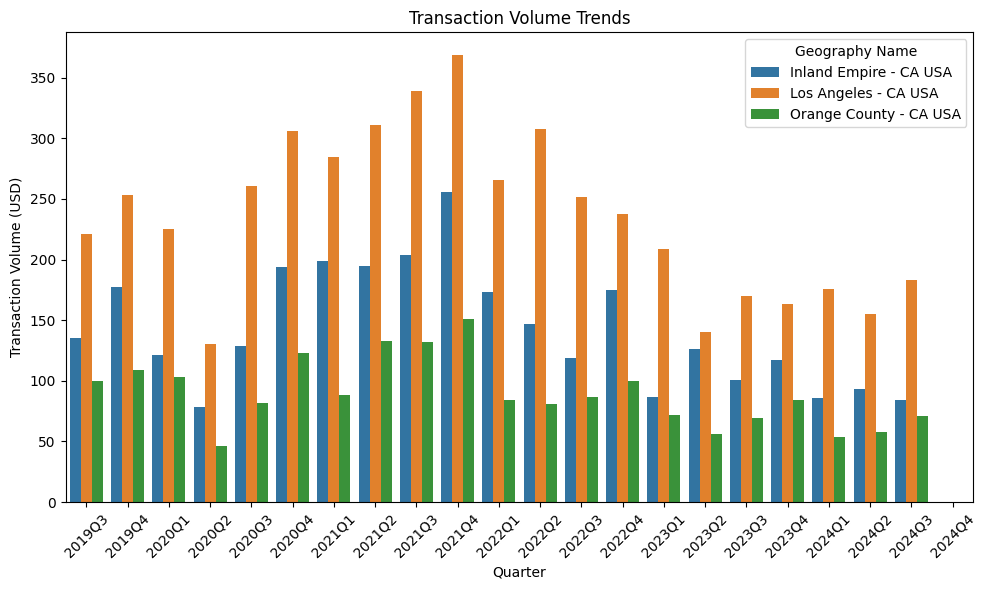

In [ ]:
# Filter data for 'Transaction Volume'
transaction_data = market_data[market_data["Concept Name"] == "Sales Volume Transactions"]

# Ensure 'Value' column is numeric, removing dollar signs and commas, and handling missing values
transaction_data.loc[:, "Value"] = pd.to_numeric(
    transaction_data["Value"].str.replace("$", "", regex=False).str.replace(",", "", regex=False),
    errors='coerce')

# Define selected markets
markets = ["Los Angeles - CA USA", "Orange County - CA USA", "Inland Empire - CA USA"]

# Filter data for the selected markets
filtered_data = transaction_data[transaction_data["Geography Name"].isin(markets)]

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot with seaborn
sns.barplot(
    data=filtered_data,
    x="Quarter",  # X-axis: Quarter
    y="Value",    # Y-axis: Transaction Volume (Value)
    hue="Geography Name",  # Use Geography Name for grouping
    errorbar=None  # Disable confidence intervals
)

# Add labels and title
plt.title("Transaction Volume Trends")
plt.xlabel("Quarter")
plt.ylabel("Transaction Volume (USD)")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


